In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models


In [2]:
vg_data = pd.read_csv('vgsales.csv')
sales_threshold = vg_data['Global_Sales'].median()
vg_data['Success'] = vg_data['Global_Sales'] > sales_threshold
vg_data = vg_data.drop(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales'], axis=1)


In [3]:
vg_data

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Success
0,41.49,29.02,3.77,8.46,True
1,29.08,3.58,6.81,0.77,True
2,15.85,12.88,3.79,3.31,True
3,15.75,11.01,3.28,2.96,True
4,11.27,8.89,10.22,1.00,True
...,...,...,...,...,...
16593,0.01,0.00,0.00,0.00,False
16594,0.01,0.00,0.00,0.00,False
16595,0.00,0.00,0.00,0.00,False
16596,0.00,0.01,0.00,0.00,False


In [4]:
X = vg_data.drop('Success', axis=1)
y = vg_data['Success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM

In [12]:
svm_classifier = SVC(kernel='poly', random_state=42)
svm_classifier.fit(X_train, y_train)

y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.79
Testing Accuracy: 0.79


In [13]:
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.99
Testing Accuracy: 0.99


In [5]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.99
Testing Accuracy: 0.99


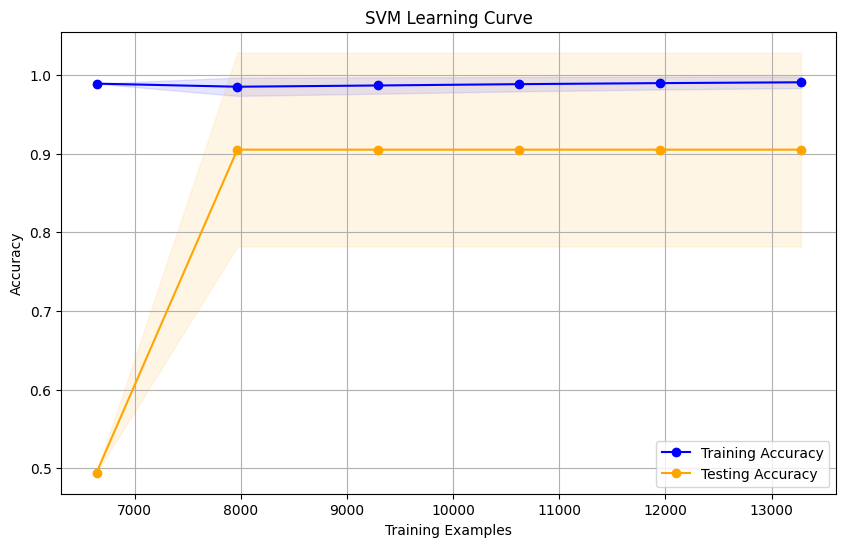

In [28]:
train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("SVM Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Testing Accuracy")
plt.legend(loc="best")
plt.show()


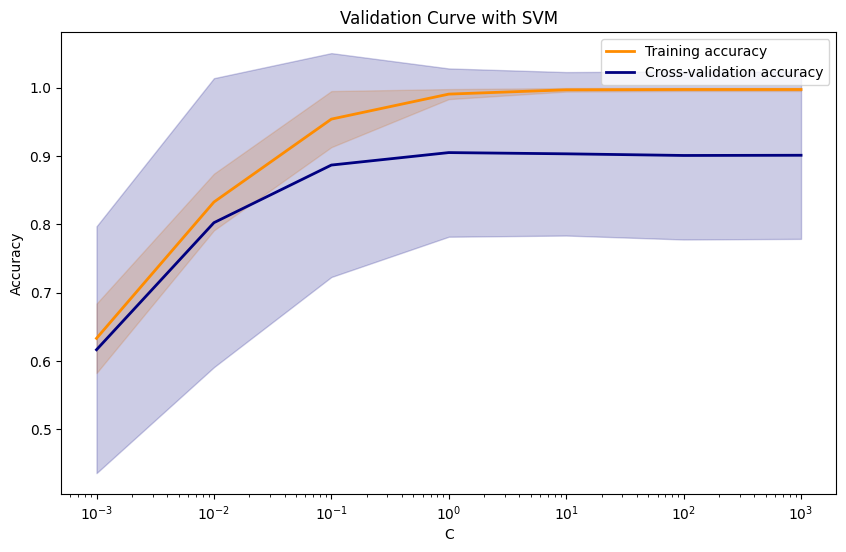

In [8]:
param_range = np.logspace(-3, 3, 7)  # Range of parameter C (log scale)
train_scores, test_scores = validation_curve(
    SVC(kernel='linear', random_state=42), X, y, param_name="C", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.semilogx(param_range, train_mean, label="Training accuracy", color="darkorange", lw=2)
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="darkorange", alpha=0.2)
plt.semilogx(param_range, test_mean, label="Cross-validation accuracy", color="navy", lw=2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="navy", alpha=0.2)
plt.legend(loc="best")
plt.show()

# KNN

In [17]:
for n_neighbors in [3, 5, 10]:
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(X_train, y_train)
    
    y_train_pred = knn_classifier.predict(X_train)
    y_test_pred = knn_classifier.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"n_neighbors: {n_neighbors} | Training Accuracy: {train_accuracy:.2f} | Testing Accuracy: {test_accuracy:.2f}")


n_neighbors: 3 | Training Accuracy: 1.00 | Testing Accuracy: 0.99
n_neighbors: 5 | Training Accuracy: 1.00 | Testing Accuracy: 0.99
n_neighbors: 10 | Training Accuracy: 0.99 | Testing Accuracy: 0.99


In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

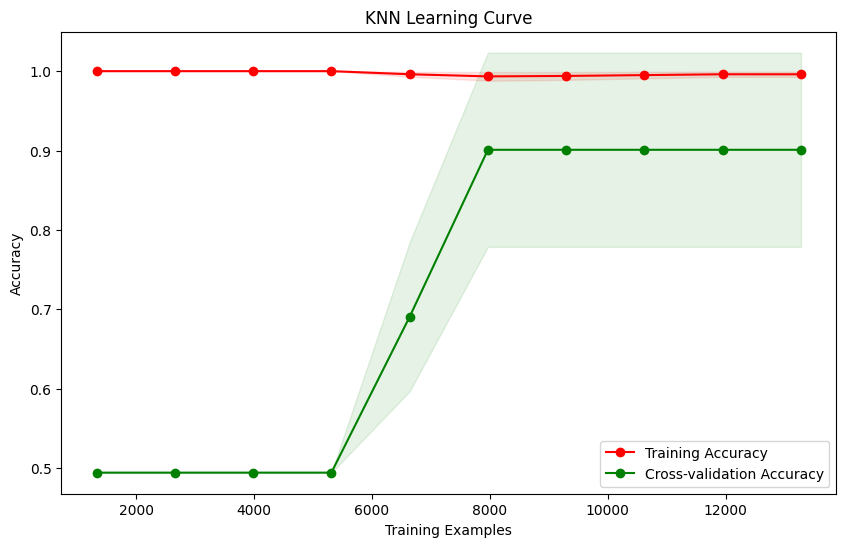

In [20]:
train_sizes, train_scores, test_scores = learning_curve(knn_classifier, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("KNN Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Accuracy")
plt.legend(loc="best")
plt.show()

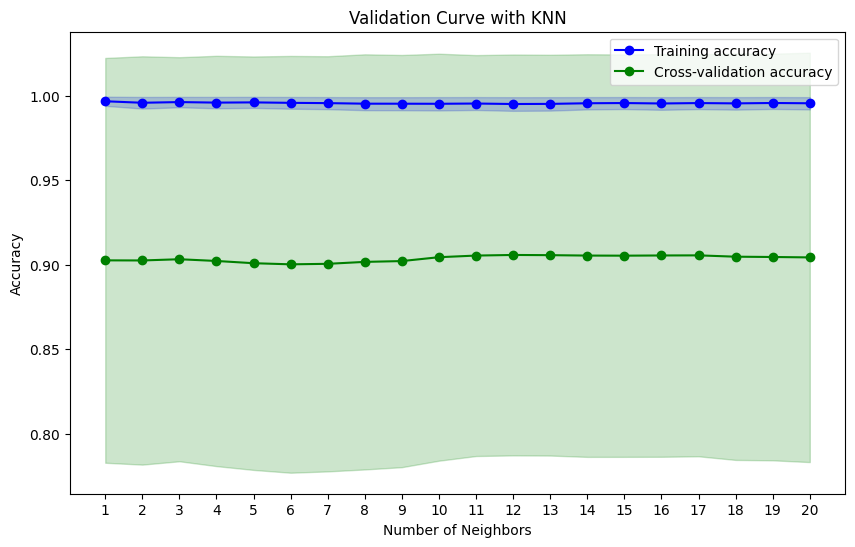

In [16]:
param_range = np.arange(1, 21)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X, y, param_name="n_neighbors", param_range=param_range, cv=5, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Validation Curve with KNN")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.plot(param_range, train_mean, label="Training accuracy", marker='o', color="blue")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.plot(param_range, test_mean, label="Cross-validation accuracy", marker='o', color="green")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)
plt.legend(loc="best")
plt.xticks(param_range)
plt.show()

# Boosting

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_boost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=5, random_state=42)

ada_boost_clf.fit(X_train, y_train)

y_train_pred = ada_boost_clf.predict(X_train)
y_test_pred = ada_boost_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.95
Testing Accuracy: 0.95


/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_boost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

ada_boost_clf.fit(X_train, y_train)

y_train_pred = ada_boost_clf.predict(X_train)
y_test_pred = ada_boost_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Accuracy: 0.99
Testing Accuracy: 0.99


In [8]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)

y_train_pred = adaboost_classifier.predict(X_train)
y_test_pred = adaboost_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.99
Testing Accuracy: 0.99


/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was ren

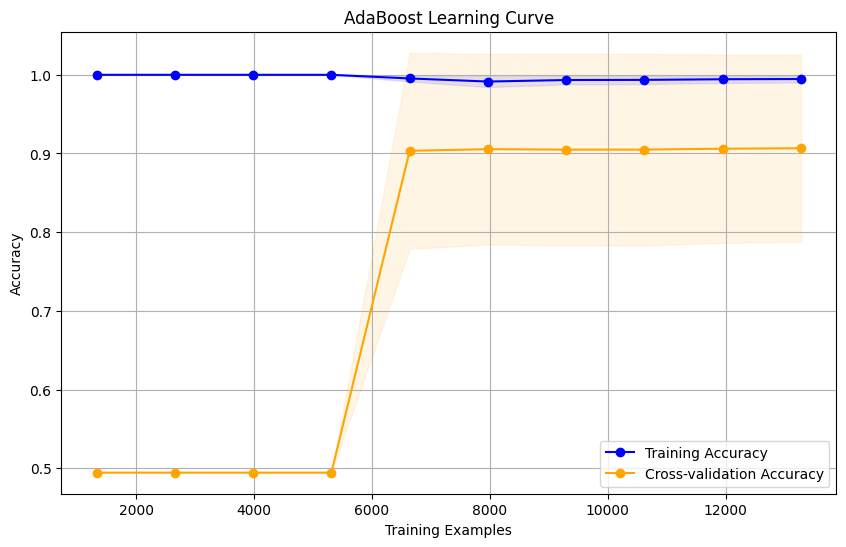

In [34]:
train_sizes, train_scores, test_scores = learning_curve(
    ada_boost_clf, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("AdaBoost Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Cross-validation Accuracy")
plt.legend(loc="best")
plt.show()

/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/nayeemaquib/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was ren

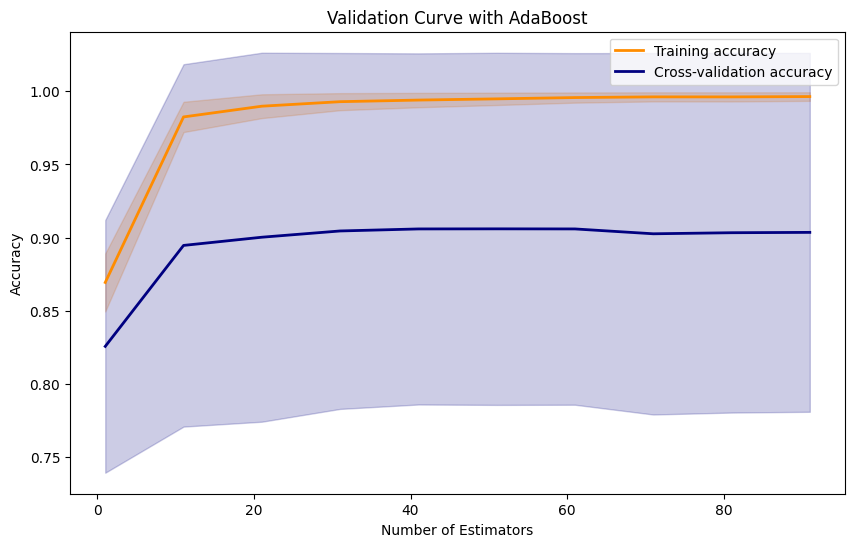

In [35]:
param_range = np.arange(1, 101, 10)  # Varying the number of estimators

train_scores, test_scores = validation_curve(
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42),
    X, y, param_name="n_estimators", param_range=param_range, cv=5, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Validation Curve with AdaBoost")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.plot(param_range, train_mean, label="Training accuracy", color="darkorange", lw=2)
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="darkorange", alpha=0.2)
plt.plot(param_range, test_mean, label="Cross-validation accuracy", color="navy", lw=2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="navy", alpha=0.2)
plt.legend(loc="best")
plt.show()

# DecisionTree

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
dt_classifier.fit(X_train, y_train)

y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.86
Testing Accuracy: 0.87


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)

y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.98
Testing Accuracy: 0.98


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(max_depth=7, random_state=42)
dt_classifier.fit(X_train, y_train)

y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.99
Testing Accuracy: 0.99


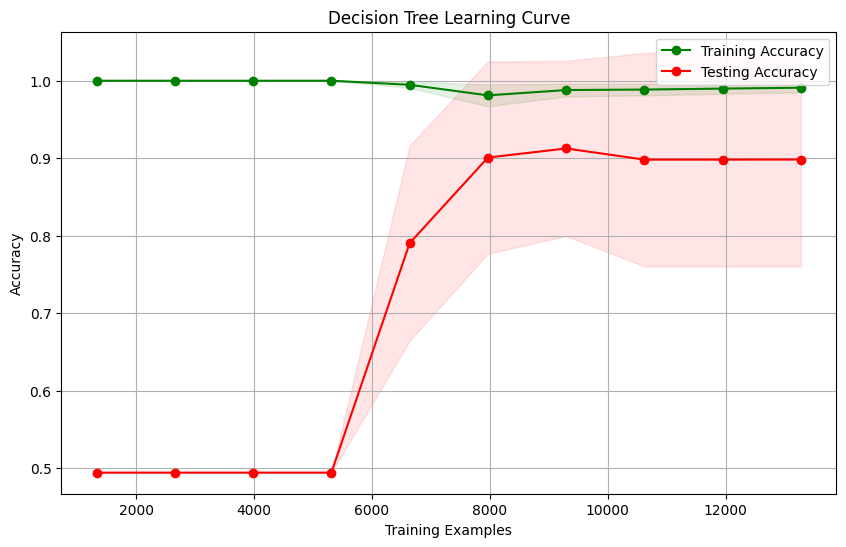

In [49]:
train_sizes, train_scores, test_scores = learning_curve(dt_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Decision Tree Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")
plt.plot(train_sizes, train_mean, 'o-', color="green", label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', color="red", label="Testing Accuracy")
plt.legend(loc="best")
plt.show()

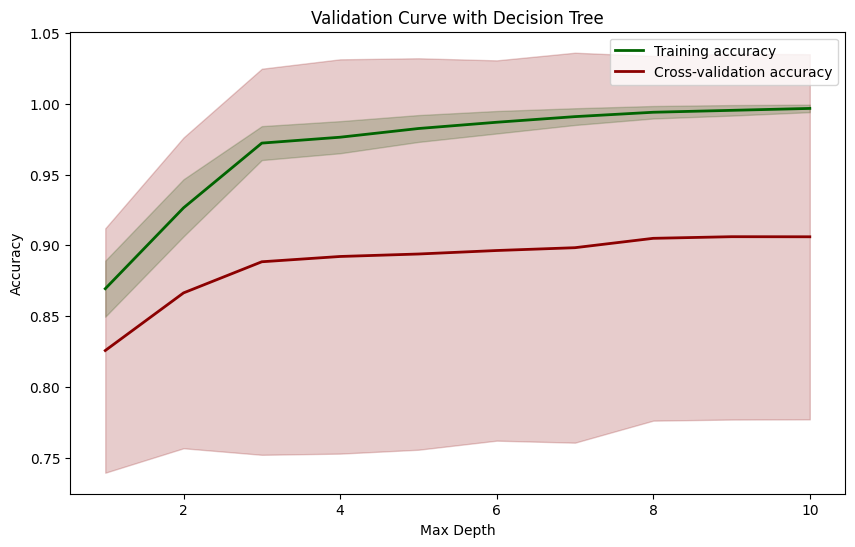

In [50]:
param_range = np.arange(1, 11) 
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=42), X, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Validation Curve with Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(param_range, train_mean, label="Training accuracy", color="darkgreen", lw=2)
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="darkgreen", alpha=0.2)
plt.plot(param_range, test_mean, label="Cross-validation accuracy", color="darkred", lw=2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="darkred", alpha=0.2)
plt.legend(loc="best")
plt.show()

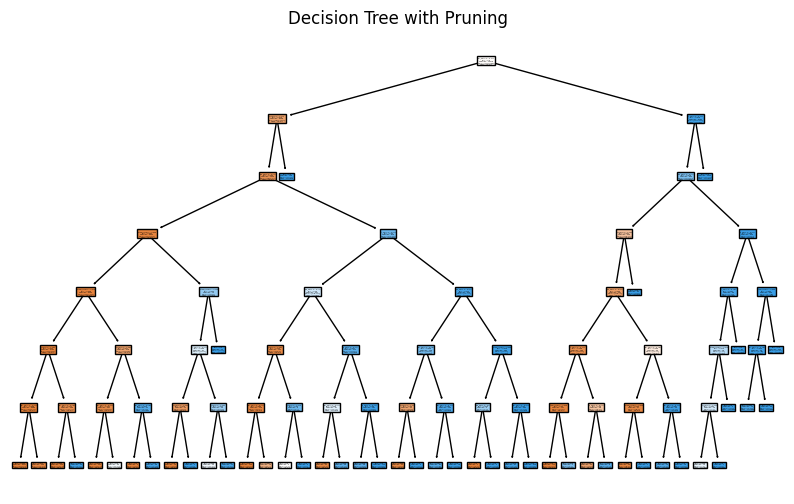

In [51]:
plt.figure(figsize=(10, 6))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Failure', 'Success'], filled=True)
plt.title("Decision Tree with Pruning")
plt.show()


# Neural Network

In [56]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=2)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Epoch 1/5
166/166 - 1s - loss: 0.6700 - accuracy: 0.8035 - val_loss: 0.6533 - val_accuracy: 0.8750 - 683ms/epoch - 4ms/step
Epoch 2/5
166/166 - 0s - loss: 0.6347 - accuracy: 0.8814 - val_loss: 0.6153 - val_accuracy: 0.8686 - 184ms/epoch - 1ms/step
Epoch 3/5
166/166 - 0s - loss: 0.5969 - accuracy: 0.8578 - val_loss: 0.5790 - val_accuracy: 0.8453 - 187ms/epoch - 1ms/step
Epoch 4/5
166/166 - 0s - loss: 0.5601 - accuracy: 0.8518 - val_loss: 0.5425 - val_accuracy: 0.8483 - 180ms/epoch - 1ms/step
Epoch 5/5
166/166 - 0s - loss: 0.5230 - accuracy: 0.8569 - val_loss: 0.5056 - val_accuracy: 0.8539 - 184ms/epoch - 1ms/step
104/104 - 0s - loss: 0.5048 - accuracy: 0.8627 - 94ms/epoch - 902us/step
Testing Accuracy: 0.86


In [57]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=2)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Epoch 1/5
166/166 - 1s - loss: 0.5071 - accuracy: 0.8749 - val_loss: 0.2721 - val_accuracy: 0.9548 - 878ms/epoch - 5ms/step
Epoch 2/5
166/166 - 0s - loss: 0.1544 - accuracy: 0.9719 - val_loss: 0.0905 - val_accuracy: 0.9816 - 184ms/epoch - 1ms/step
Epoch 3/5
166/166 - 0s - loss: 0.0684 - accuracy: 0.9904 - val_loss: 0.0528 - val_accuracy: 0.9970 - 185ms/epoch - 1ms/step
Epoch 4/5
166/166 - 0s - loss: 0.0450 - accuracy: 0.9932 - val_loss: 0.0382 - val_accuracy: 0.9944 - 185ms/epoch - 1ms/step
Epoch 5/5
166/166 - 0s - loss: 0.0353 - accuracy: 0.9934 - val_loss: 0.0313 - val_accuracy: 0.9944 - 248ms/epoch - 1ms/step
104/104 - 0s - loss: 0.0333 - accuracy: 0.9931 - 90ms/epoch - 863us/step
Testing Accuracy: 0.99


In [69]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=2)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Epoch 1/10
166/166 - 1s - loss: 0.4218 - accuracy: 0.9149 - val_loss: 0.1929 - val_accuracy: 0.9627 - 1s/epoch - 7ms/step
Epoch 2/10
166/166 - 0s - loss: 0.1134 - accuracy: 0.9785 - val_loss: 0.0720 - val_accuracy: 0.9944 - 185ms/epoch - 1ms/step
Epoch 3/10
166/166 - 0s - loss: 0.0563 - accuracy: 0.9914 - val_loss: 0.0450 - val_accuracy: 0.9944 - 184ms/epoch - 1ms/step
Epoch 4/10
166/166 - 0s - loss: 0.0400 - accuracy: 0.9932 - val_loss: 0.0344 - val_accuracy: 0.9970 - 177ms/epoch - 1ms/step
Epoch 5/10
166/166 - 0s - loss: 0.0319 - accuracy: 0.9944 - val_loss: 0.0284 - val_accuracy: 0.9970 - 179ms/epoch - 1ms/step
Epoch 6/10
166/166 - 0s - loss: 0.0273 - accuracy: 0.9945 - val_loss: 0.0255 - val_accuracy: 0.9974 - 181ms/epoch - 1ms/step
Epoch 7/10
166/166 - 0s - loss: 0.0240 - accuracy: 0.9954 - val_loss: 0.0223 - val_accuracy: 0.9970 - 183ms/epoch - 1ms/step
Epoch 8/10
166/166 - 0s - loss: 0.0221 - accuracy: 0.9957 - val_loss: 0.0237 - val_accuracy: 0.9883 - 190ms/epoch - 1ms/step
Epo

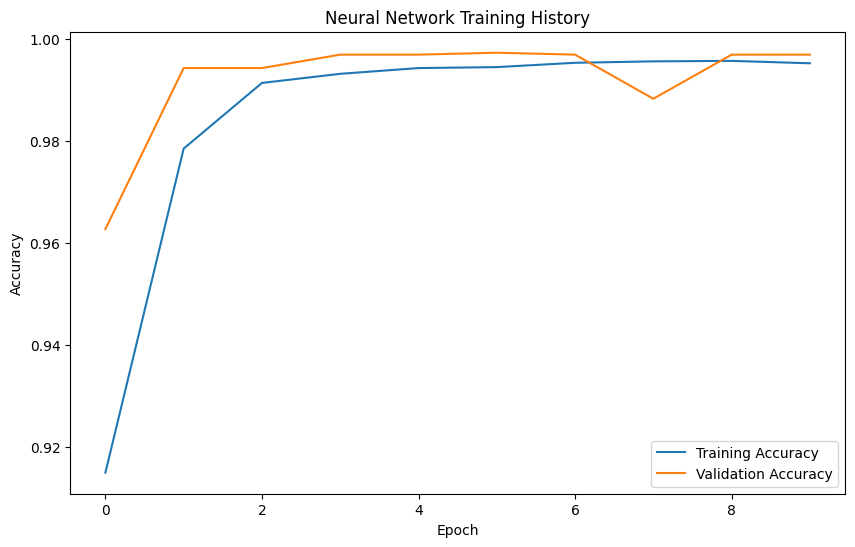

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Neural Network Training History')
plt.legend(loc='lower right')
plt.show()

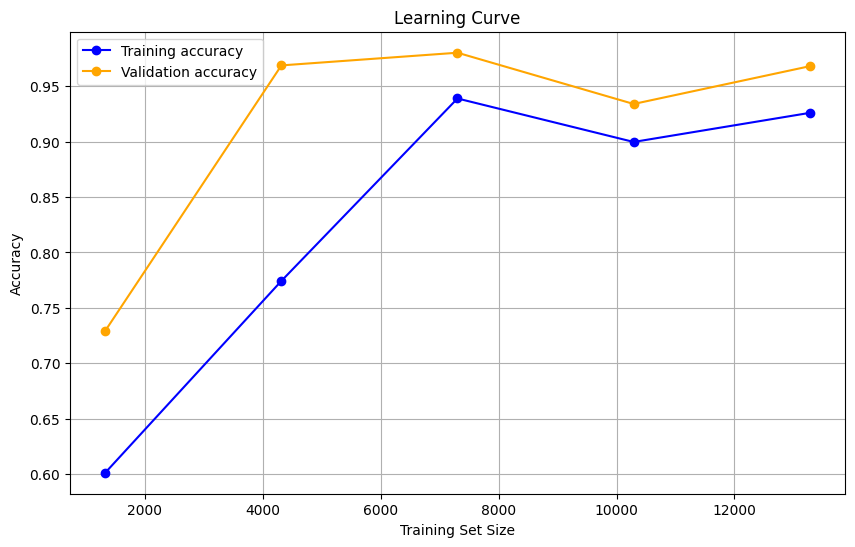

In [72]:
def create_model():
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

train_sizes = [int(len(X_train) * x) for x in np.linspace(0.1, 1.0, 5)]
train_scores = []
val_scores = []

for size in train_sizes:
    # Take a subset of the training data with the current size
    X_train_subset = X_train[:size]
    y_train_subset = y_train[:size]
    
    # Create a new model (to reset weights)
    model = create_model()
    
    # Train the model
    history = model.fit(X_train_subset, y_train_subset, epochs=1, batch_size=64, validation_split=0.2, verbose=0)
    
    # Save the scores for plotting
    train_scores.append(history.history['accuracy'][-1])
    val_scores.append(history.history['val_accuracy'][-1])

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, 'o-', color="blue", label="Training accuracy")
plt.plot(train_sizes, val_scores, 'o-', color="orange", label="Validation accuracy")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

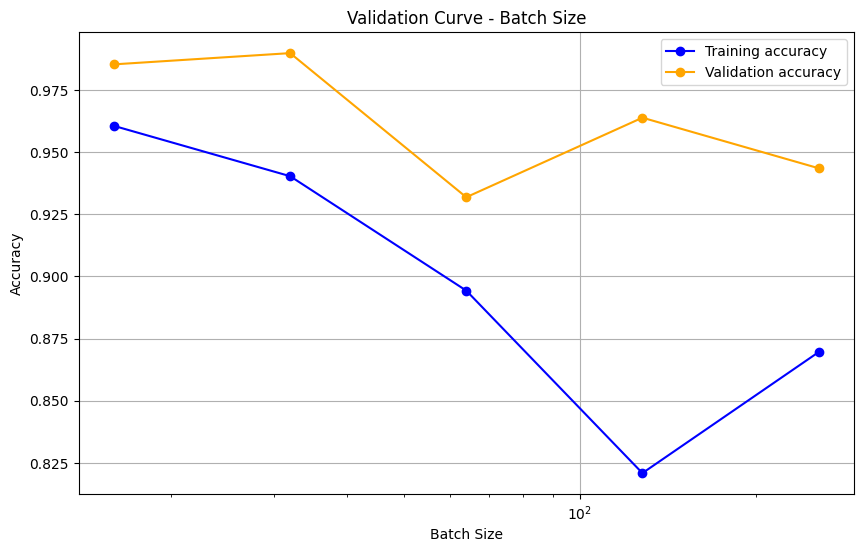

In [73]:
batch_sizes = [16, 32, 64, 128, 256]
train_scores = []
val_scores = []

for batch_size in batch_sizes:
    model = create_model()
    
    history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, validation_split=0.2, verbose=0)
    
    train_scores.append(history.history['accuracy'][-1])
    val_scores.append(history.history['val_accuracy'][-1])

plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, train_scores, 'o-', color="blue", label="Training accuracy")
plt.plot(batch_sizes, val_scores, 'o-', color="orange", label="Validation accuracy")
plt.title("Validation Curve - Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.xscale('log')
plt.legend(loc="best")
plt.grid()
plt.show()
